# Principal Component Analysis

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [3]:
p1 = pathlib.PureWindowsPath(r'C:\Users\guzma\OneDrive\Documents\TEC\DTU\02450\Exercises\toolbox\02450Toolbox_Python\Data\nanonose.xls')
df = pd.read_excel(p1, header=1)

In [4]:
df.head()

,Sample type,Concentration,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Water,9200,NaN,95.5,21.0,6.0,11.942308,64.134615,21.498560,5.567840,1.174135
1,Water,9200,NaN,94.5,17.0,5.0,5.484615,63.205769,19.658560,4.968000,1.883444
2,Water,9200,NaN,92.0,16.0,3.0,11.057692,62.586538,19.813120,5.192480,0.564835
3,Water,4600,NaN,53.0,7.5,2.5,3.538462,35.163462,6.876207,1.641724,0.144654
4,Water,4600,NaN,51.0,7.5,2.5,4.865385,34.057692,6.757241,1.613966,0.059663


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample type    90 non-null     object 
 1   Concentration  90 non-null     int64  
 2   Unnamed: 2     0 non-null      float64
 3   Unnamed: 3     90 non-null     float64
 4   Unnamed: 4     90 non-null     float64
 5   Unnamed: 5     90 non-null     float64
 6   Unnamed: 6     90 non-null     float64
 7   Unnamed: 7     90 non-null     float64
 8   Unnamed: 8     90 non-null     float64
 9   Unnamed: 9     90 non-null     float64
 10  Unnamed: 10    90 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 7.9+ KB


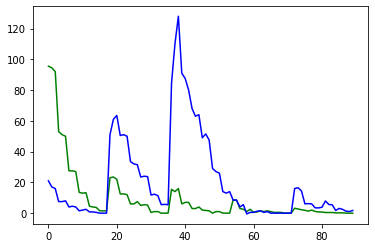

In [6]:
plt.plot(df['Unnamed: 3'], color='green')
plt.plot(df['Unnamed: 4'], color='blue')
plt.show()

In [7]:
df.rename(columns={'Unnamed: 2':'0','Unnamed: 3':'A','Unnamed: 4':'B','Unnamed: 5':'C','Unnamed: 6':'D','Unnamed: 7':'E','Unnamed: 8':'F','Unnamed: 9':'G','Unnamed: 10':'H'}, inplace=True)
df.head()

,Sample type,Concentration,0,A,B,C,D,E,F,G,H
0,Water,9200,NaN,95.5,21.0,6.0,11.942308,64.134615,21.498560,5.567840,1.174135
1,Water,9200,NaN,94.5,17.0,5.0,5.484615,63.205769,19.658560,4.968000,1.883444
2,Water,9200,NaN,92.0,16.0,3.0,11.057692,62.586538,19.813120,5.192480,0.564835
3,Water,4600,NaN,53.0,7.5,2.5,3.538462,35.163462,6.876207,1.641724,0.144654
4,Water,4600,NaN,51.0,7.5,2.5,4.865385,34.057692,6.757241,1.613966,0.059663


In [27]:
features = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
x = df.loc[:, features].values
y = df.loc[:, ['Sample type']].values

x = StandardScaler().fit_transform(x)
components = 3
col = []

pca = PCA(n_components=components)
principalComponents = pca.fit_transform(x)

for i in range(components):
    name = "principal component {component}".format(component=i+1)
    col.append(name)

principalDf = pd.DataFrame(data = principalComponents
             , columns = col)

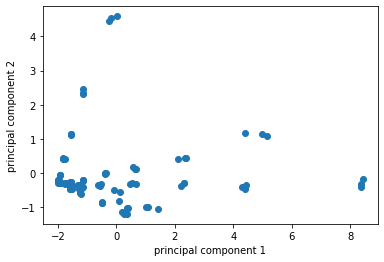

In [9]:
plt.scatter(x = principalDf['principal component 1'], y = principalDf['principal component 2'])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [14]:
finalDf = pd.concat([principalDf, df[['Sample type']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Sample type
0,0.003457,4.589463,Water
1,-0.200850,4.546491,Water
2,-0.260109,4.458664,Water
3,-1.140591,2.455102,Water
4,-1.148100,2.354368,Water


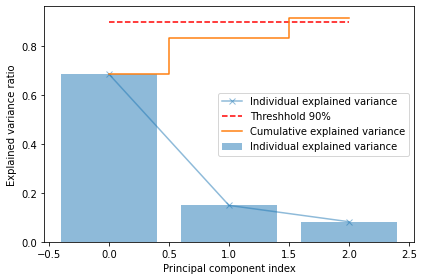

In [45]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
# plt.plot(range(0,len(exp_var_pca)), exp_var_pca, 'x-' , alpha=0.5, label='Individual explained variance')
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(range(0,len(exp_var_pca)), [0.9,0.9,0.9], 'r--', label='Threshhold 90%')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()